<a href="https://colab.research.google.com/github/chauhan231405/DVLAB/blob/main/DataVisualizationLab2_16_10_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIM
### Apply PCA
###good case - wine data
###bad case - MNIST fation dataset
### when we should use pca?
### create 3d graphs of both the cases as well

## On Wine Data

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade seaborn
!pip install --upgrade matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('winequality-red.csv')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1128,10.0,0.430,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,5
430,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
796,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,5
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5,5
639,8.9,0.290,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

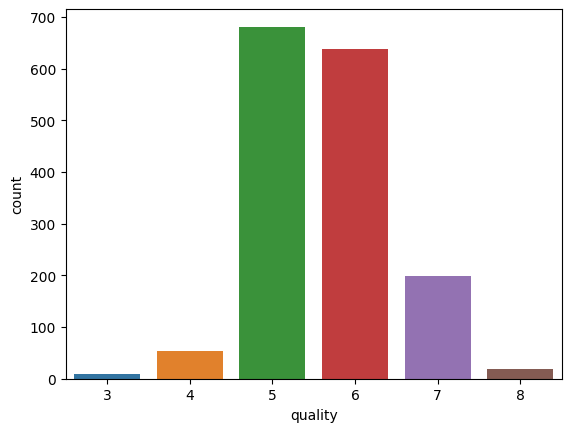

In [ ]:
sns.countplot(x = 'quality',data=df) #check imbalance

In [ ]:
df['quality_category'] = df['quality'].apply(lambda y_value: 1 if  y_value > 6 else 0)
df = df.drop('quality',axis = 1)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.99620,3.44,0.58,10.7,0
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,0
315,7.1,0.350,0.29,2.5,0.096,20.0,53.0,0.99620,3.42,0.65,11.0,0
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5,0
1035,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,1


<Axes: xlabel='quality_category', ylabel='count'>

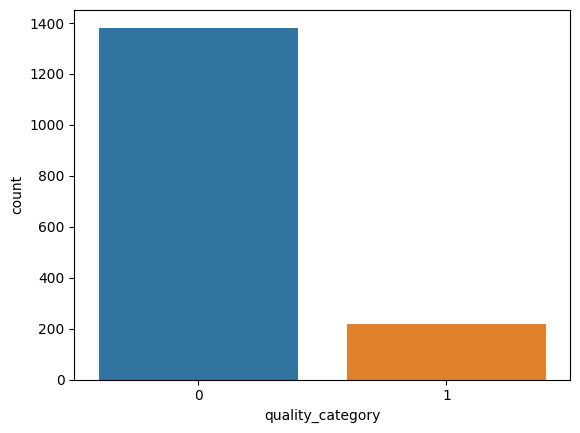

In [ ]:
sns.countplot(x = 'quality_category',data=df)

In [ ]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(df)
scaled_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.39625599],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.39625599],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.39625599],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988, -0.39625599],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.39625599],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988, -0.39625599]])

In [ ]:
pca=PCA(n_components=3)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(1599, 12)

In [ ]:
x_pca.shape

(1599, 3)

In [ ]:
x_pca

array([[-1.70716697,  0.92903255, -1.41814163],
       [-0.91591679,  1.93107029, -0.09158299],
       [-0.83957699,  1.1856365 , -0.73328532],
       ...,
       [-1.46997418,  0.00861634,  1.05252445],
       [-2.31699956,  0.67183955,  0.90493975],
       [-0.40533931, -0.78165981,  1.12270951]])

Text(0.5, 0.92, 'PCA of Wine Dataset')

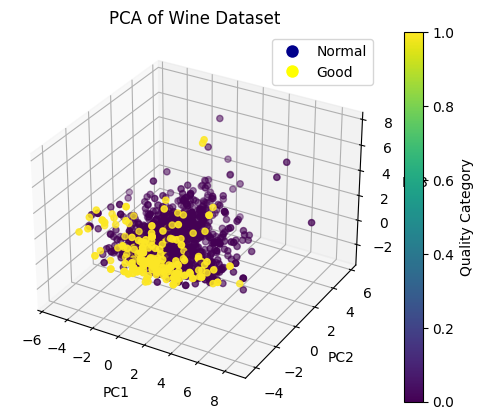

In [ ]:
fig = plt.figure()
color=df['quality_category']
colormap=plt.get_cmap('viridis')
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2],cmap=colormap,c=color)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cbar = plt.colorbar(scatter)
cbar.set_label('Quality Category')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='darkblue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', label='Good', markerfacecolor='yellow', markersize=10)]
plt.legend(handles=legend_elements)

plt.title('PCA of Wine Dataset')

## On Fasion MNIST

###Labels
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [ ]:
df2 = pd.read_csv('fashion-mnist_test.csv')
df2.sample(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4337,6,0,0,0,1,1,0,1,3,0,...,90,74,0,0,1,0,0,0,0,0
6216,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8271,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6676,4,0,0,0,0,0,0,0,0,0,...,0,1,0,74,87,32,0,0,0,0
561,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
label,10000.0,4.5000,2.872425,0.0,2.0,4.5,7.0,9.0
pixel1,10000.0,0.0004,0.024493,0.0,0.0,0.0,0.0,2.0
pixel2,10000.0,0.0103,0.525187,0.0,0.0,0.0,0.0,45.0
pixel3,10000.0,0.0521,2.494315,0.0,0.0,0.0,0.0,218.0
pixel4,10000.0,0.0770,2.208882,0.0,0.0,0.0,0.0,185.0
...,...,...,...,...,...,...,...,...
pixel780,10000.0,17.7902,45.128107,0.0,0.0,0.0,0.0,255.0
pixel781,10000.0,8.3535,28.765769,0.0,0.0,0.0,0.0,240.0
pixel782,10000.0,2.5416,16.417363,0.0,0.0,0.0,0.0,225.0
pixel783,10000.0,0.6295,7.462533,0.0,0.0,0.0,0.0,205.0


In [ ]:
df2.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

<Axes: xlabel='label', ylabel='count'>

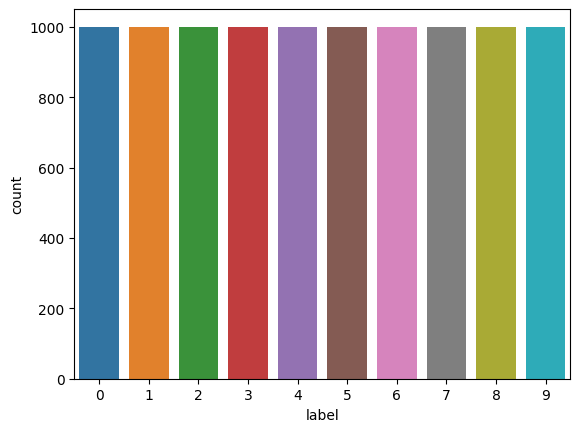

In [ ]:
sns.countplot(x = 'label',data=df2) #check imbalance

In [ ]:
scaler2=StandardScaler()
scaler2.fit(df2)

StandardScaler()

In [ ]:
scaled_data2=scaler2.transform(df2)
scaled_data2

array([[-1.5666989 , -0.01633211, -0.01961304, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-1.21854359, -0.01633211, -0.01961304, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.87038828, -0.01633211, -0.01961304, ..., -0.15481944,
        -0.08435895, -0.03392051],
       ...,
       [ 1.21854359, -0.01633211, -0.01961304, ..., -0.15481944,
         0.0496505 , -0.03392051],
       [ 1.21854359, -0.01633211,  1.88456549, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-1.21854359, -0.01633211, -0.01961304, ..., -0.15481944,
        -0.08435895, -0.03392051]])

In [ ]:
pca2=PCA(n_components=3)
pca2.fit(scaled_data2)
x_pca2=pca2.transform(scaled_data2)

In [ ]:
scaled_data2.shape

(10000, 785)

In [ ]:
x_pca2.shape

(10000, 3)

In [ ]:
x_pca2

array([[ 15.95044147,  -4.21875285,  -0.65177637],
       [ -1.05147852, -17.49109363,  -5.48212207],
       [ -9.74841073,  -3.32386139,  12.49199501],
       ...,
       [  4.22065824,  10.50397831,   4.38300665],
       [ 19.41676545,  18.43420082,   2.28106801],
       [ 22.48601366,  -0.81503932,   4.41589887]])

Text(0.5, 0.92, 'PCA of Fashion MNIST')

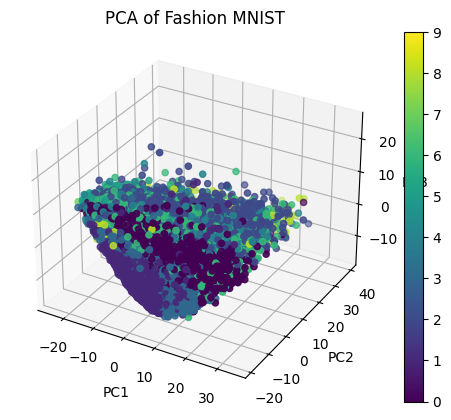

In [ ]:
fig2 = plt.figure()
color2=df2['label']
colormap2=plt.get_cmap('viridis')
ax2 = fig2.add_subplot(111, projection='3d')

scatter2 = ax2.scatter(x_pca2[:,0], x_pca2[:,1], x_pca2[:,2],cmap=colormap2,c=color2)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

cbar2 = plt.colorbar(scatter2)
cbar.set_label('Label')

plt.title('PCA of Fashion MNIST')